*parcours en largeur - M. Liedloff, février 2018*

# Consignes

- sur Celene, téléchargez les fichiers indiqués
- ouvrir un `terminal`, se déplacer dans le dossier où les fichiers ont été téléchargé (commande `cd`)
- tapez dans le terminal la commande : `jupyter notebook`
- ouvrir le fichier .pynb

# Manipulation de graphes et parcours en largeur

Nous utilisons la syntaxe suivante, à base de dictionnaires et de listes, pour définir un graphe en Python : 

In [1]:
G = {
    "a": ["b"],
    "b": ["a", "c", "d"],
    "c": ["b", "d"],
    "d": ["b", "c", "e"],
    "e": ["d"]
}

Error: Jupyter cannot be started. Error attempting to locate jupyter: Data Science libraries jupyter and notebook are not installed in interpreter Python 3.8.2 64-bit.

Ainsi, une fonction qui parcourt toutes les arêtes d'un graphe s'écrit simplement: 

In [2]:
def AfficherAretes(G):
    for u in G:
        for v in G[u]:
            print("Arête {%s,%s}" % (u,v))

In [3]:
AfficherAretes(G)

Arête {a,b}
Arête {b,a}
Arête {b,c}
Arête {b,d}
Arête {e,d}
Arête {c,b}
Arête {c,d}
Arête {d,b}
Arête {d,c}
Arête {d,e}


Il est également possible d'afficher un graphe en utilisant [GraphViz](https://www.graphviz.org/) ([lien vers la documentation](http://graphviz.readthedocs.io/en/stable/index.html)).
Si le code ci-dessous ne fonctionne pas sur votre machine, cela n'empêchera pas le bon déroulement de la suite du TP. Cela indique seulement que la librairie graphviz n'est pas installée.

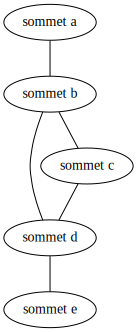

In [2]:
from graphviz import Graph
dot = Graph()

for v in G:
    dot.node(v, "sommet "+v)

for v in G:
    for u in G[v]:
        if v<=u:
            dot.edge(v, u)
dot

Petite astuce: les **[dictionnaires](https://docs.python.org/3.5/tutorial/datastructures.html#dictionaries)** sont très utiles pour définir des états (ou d'autres choses). On peut définir une variable etats et s'en servir plus tard de la façon suivante :

```
etats = {}
...
etats[u] = "non atteint"
...
if etats[u]=="non atteint":
etats[u] = "atteint"
```

On peut aussi utiliser des **[ensembles](https://docs.python.org/3.5/tutorial/datastructures.html#sets)** :
```
sommetsAtteints = set()
...
sommetsAtteints.add(u)
...
if u not in sommetsAtteints:
# do something
```

Une **file FIFO** peut être implémentée en utilisant une *liste*.
On y ajoute un élément avec la méthode `append`. Un élément est extrait avec la méthode `pop`. Voici un exemple pour manipuler une liste comme une file FIFO. Prenez le temps de lire ce code et de regarder le résultat produit.

In [3]:
def estvide(F):
    """ cette fonction retourne True si la liste est vide, sinon elle retourne False"""
    if F:
        return False
    else:
        return True

F = ["élément A"] # pour initialiser une file vide : F = []
F.append("élément B") # ajoute un élément
print(F)
e = F.pop(0) # défile un élément
print(e)
F.append("élément C")
print(F)

print("longueur de la liste", len(F))

# tant que la file n'est pas vide, on défile un élément et on l'affiche :
while F:
    print(F.pop(0))

print(estvide(F))

['élément A', 'élément B']
élément A
['élément B', 'élément C']
longueur de la liste 2
élément B
élément C
True


# Parcours en largeur

## question 1
Écrire une fonction `ParcoursLargeur(G,s)` de parcours en largeur, la mettre au point, et la tester sur le graphe `G` précédent (ou un autre graphe de votre choix). Cette fonction attend en entrée un graphe `G` et un sommet `s` à partir duquel le graphe est exploré.

Pour le moment, vous n'avez pas besoin de gérer la distance `d` et le père `pere` de chaque sommet.

![algorithme du parcours en largeur](http://www.univ-orleans.fr/lifo/Members/Mathieu.Liedloff/temp/ACSD/TP1/parcourslargeur.png)

In [55]:
def ParcoursLargeur(G,s):
    etat={}
    F=[]
    for u in G:
        etat[u]='non atteint'
    etat[s]='atteint'
    F.append(s)
    while F:
        print ('la liste FIFO :',F)
        u=F.pop(0)
        for v in G[u]:
            print ('\t',v,' est voisin de ',u,' etat[v]',etat[v])
            if etat[v]=='non atteint' :
                etat[v]=='atteint'
                
                if Cookie(v):
                    return v
                F.append(v)

        etat[u]='traite'
print (G)

{'a': ['b'], 'd': ['b', 'c', 'e'], 'c': ['b', 'd'], 'b': ['a', 'c', 'd'], 'e': ['d']}


In [19]:
ParcoursLargeur(G,'a')

la liste FIFO : ['a']
	 b  est voisin de  a  etat[v] non atteint
la liste FIFO : ['b']
	 a  est voisin de  b  etat[v] traite
	 c  est voisin de  b  etat[v] non atteint
	 d  est voisin de  b  etat[v] non atteint
la liste FIFO : ['c', 'd']
	 b  est voisin de  c  etat[v] traite
	 d  est voisin de  c  etat[v] non atteint
la liste FIFO : ['d', 'd']
	 b  est voisin de  d  etat[v] traite
	 c  est voisin de  d  etat[v] traite
	 e  est voisin de  d  etat[v] non atteint
la liste FIFO : ['d', 'e']
	 b  est voisin de  d  etat[v] traite
	 c  est voisin de  d  etat[v] traite
	 e  est voisin de  d  etat[v] non atteint
la liste FIFO : ['e', 'e']
	 d  est voisin de  e  etat[v] traite
la liste FIFO : ['e']
	 d  est voisin de  e  etat[v] traite


## question 2
Un cookie a été caché sur l'un des sommets d'un graphe. Vous ne connaissez pas ce graphe (il est stocké sur un serveur), mais vous disposez des fonctions suivantes :
- **`getAVertex()`** retourne un sommet du graphe à partir duquel vous commencez l'exploration du graphe.
- **`getNeighbors(u)`** retourne la liste des voisins d'un sommet `u`.
- **`Cookie(u)`** retourne True si et seulement si un cookie se trouve sur le sommet `u`.

Pour vous connectez au serveur contenant le graphe, nous importons quelques fonctions puis nous utilisons la fonction connectSocket: 

In [72]:
from utils import connectSocket, closeSocket, sendcmd, recvcmd
from utils import getNeighbors, getAVertex, Cookie, CookieDistance

connectSocket("uomobile.univ-orleans.fr", 6667)

Attention: le graphe change à chaque connexion, sinon ce serait trop facile ! Il faut donc que votre algorithme de parcours soit vraiment au point.

Voici un petit exemple d'utilisation de ces fonctions:

In [40]:
sommetInitial = getAVertex()
print("Le sommet initial est", sommetInitial)

for v in getNeighbors(sommetInitial):
    print("Le sommet",sommetInitial, "est voisin avec", v)

print("Le sommet ",sommetInitial, "contient-il un cookie ?", Cookie(sommetInitial))  

>>> GetStartingVertex 
<<< StartingVertex AD590
Le sommet initial est AD590
>>> GetNeighbor AD590
<<< Neighborhood RI582#DD064#QB936#IY205#TU209#YE988#GS884
Le sommet AD590 est voisin avec RI582
Le sommet AD590 est voisin avec DD064
Le sommet AD590 est voisin avec QB936
Le sommet AD590 est voisin avec IY205
Le sommet AD590 est voisin avec TU209
Le sommet AD590 est voisin avec YE988
Le sommet AD590 est voisin avec GS884
>>> Cookie? AD590
<<< Cookie No
Le sommet  AD590 contient-il un cookie ? False


Les lignes avec des chevrons `>>>` et `<<<` sont simplement les messages échangés entre votre machine et le serveur. Vous pouvez les ignorer ...

Il faut maintenant adaptez votre algorithme de parcours en largeur pour écrire une fonction **`ParcoursLargeurNetwork()`** qui parcourt le graphe du serveur et affiche le nom du sommet contenant le cookie. 
**Saurez-vous trouver le cookie dans le graphe ?**

In [60]:
def voisin(s):
    l=[]
    for v in getNeighbors(s):
       l.append(v) 
    return l



def ParcoursLargeurNetwork():
    s = getAVertex()

    
    
    g={}
    g[s]= voisin(s)
    print ('liste g avant iteration:',g)
    
    
    for u in g:
        for v in g[u]:
            g[v]= voisin(v)
            print ('liste g 1:',g)
        print('liste g 2====>',g)
    
    
    
    etat[s]='atteint'
    F.append(s)
    while F:
        print ('la liste FIFO :',F)
        u=F.pop(0)
        for v in getNeighbors(u):
            print ('\t',v,' est voisin de ',u,' etat[v]',etat[v])
            if etat[v]=='non atteint' :
                etat[v]=='atteint'
                if Cookie(v):
                    return v
                F.append(v)
        etat[u]='traite'
        

'''
G = {
    "a": ["b"],
    "b": ["a", "c", "d"],
    "c": ["b", "d"],
    "d": ["b", "c", "e"],
    "e": ["d"]
}


def AfficherAretes(G):
    for u in G:
        for v in G[u]:
            print("Arête {%s,%s}" % (u,v))
'''

'\nG = {\n    "a": ["b"],\n    "b": ["a", "c", "d"],\n    "c": ["b", "d"],\n    "d": ["b", "c", "e"],\n    "e": ["d"]\n}\n\n\ndef AfficherAretes(G):\n    for u in G:\n        for v in G[u]:\n            print("Arête {%s,%s}" % (u,v))\n'

In [84]:
## correction
def ParcoursLargeurNetwork():
    s = getAVertex()
    atteint={s}
    d={}
    d[s]=0
    p={}
    p[s]=None
    E=[s]
    while E:
        u=E.pop(0)
        if Cookie(u):
            while p[u]!=None:
                print ('pU',p[u])
                p[u]=p[p[u]]
            
        for v in getNeighbors(u):
            if v not in atteint:
                atteint.add(v)
                E.append(v)
                d[v]=d[u]+1
                p[v]=u
                
    

In [73]:
coo = ParcoursLargeurNetwork()
print("Le cookie est sur le sommet", coo)

>>> GetStartingVertex 
<<< StartingVertex AG401
>>> Cookie? AG401
<<< Cookie No
>>> GetNeighbor AG401
<<< Neighborhood KD204#CB090#HS761#CT301#RZ564#IR852#SI953#XL968#WT982
>>> Cookie? KD204
<<< Cookie No
>>> GetNeighbor KD204
<<< Neighborhood LJ100#AG401#IM601#PC802#GK249#CT301#SI953#YQ872#XR433
>>> Cookie? CB090
<<< Cookie No
>>> GetNeighbor CB090
<<< Neighborhood AG401#HT143#CU260#XL968#GO080#IE339#WG168#ZY411
>>> Cookie? HS761
<<< Cookie No
>>> GetNeighbor HS761
<<< Neighborhood AG401#NA716#AL852#IE339#MY328#PN232#WE888
>>> Cookie? CT301
<<< Cookie No
>>> GetNeighbor CT301
<<< Neighborhood OO132#NB883#PB574#HP907#AG401#LE074#BN454#OQ483#GK249#KD204#VN523
>>> Cookie? RZ564
<<< Cookie No
>>> GetNeighbor RZ564
<<< Neighborhood HT404#OO132#FZ551#WO351#AG401#HP907#XT517
>>> Cookie? IR852
<<< Cookie No
>>> GetNeighbor IR852
<<< Neighborhood SI953#UC008#AG401#PG826
>>> Cookie? SI953
<<< Cookie No
>>> GetNeighbor SI953
<<< Neighborhood GF108#EE389#IR852#DK862#PN232#KD204#AG401#HP907#KH231#

<<< Cookie No
>>> GetNeighbor DH111
<<< Neighborhood WJ496#BJ814#OO132#GP038#HW752#WE888#FK101#HT143
>>> Cookie? EC461
<<< Cookie No
>>> GetNeighbor EC461
<<< Neighborhood QP087#UM216#WE888#AN903#KH231#HT143
>>> Cookie? II164
<<< Cookie No
>>> GetNeighbor II164
<<< Neighborhood GO080#GM334#VB087#YL162#ET367#WG168
>>> Cookie? WY993
<<< Cookie No
>>> GetNeighbor WY993
<<< Neighborhood GP038#VI143#VR125#LT610#DE570#GO080#TA581#JD166#UD627#GH246#AO601
>>> Cookie? RR050
<<< Cookie No
>>> GetNeighbor RR050
<<< Neighborhood WN456#VM157#IE339#GO080#VB087#KC240
>>> Cookie? UT436
<<< Cookie No
>>> GetNeighbor UT436
<<< Neighborhood SQ846#UD627#IE339
>>> Cookie? IK851
<<< Cookie No
>>> GetNeighbor IK851
<<< Neighborhood FE826#WG168#OO132#LM865#OQ483
>>> Cookie? UC030
<<< Cookie No
>>> GetNeighbor UC030
<<< Neighborhood WG168#RV557#NA716#FV717#PD724
>>> Cookie? JU841
<<< Cookie No
>>> GetNeighbor JU841
<<< Neighborhood KI457#MP901#WG168
>>> Cookie? KG529
<<< Cookie No
>>> GetNeighbor KG529
<<< Nei

<<< Cookie No
>>> GetNeighbor JZ341
<<< Neighborhood KG529#HA387#XD074#WJ496
>>> Cookie? YM751
<<< Cookie No
>>> GetNeighbor YM751
<<< Neighborhood WX121#CH234#VR254#OY363
>>> Cookie? OT696
<<< Cookie Yes!
==========================> i= 149
Le cookie est sur le sommet OT696


## question 3

Déterminez la distance entre le sommet retourné par `getAVertex()` et le sommet contenant le cookie. Pour vérifier votre résultat, utilisez la fonction **`CookieDistance(r)`** qui attend en paramètre la distance `r` que vous avez calculée et retourne `True` si et seulement si votre résultat est correct. 

In [77]:
print("Le cookie est sur le sommet", coo, Cookie(coo) )
print("Le cookie est à distance", 148, CookieDistance(148))

>>> Cookie? OT696
<<< Cookie Yes!
Le cookie est sur le sommet OT696 True
>>> CookieDistance? 148
<<< CookieDistance No
Le cookie est à distance 148 False


In [82]:
(coo, dist) = ParcoursLargeurNetwork()
print("Le cookie est sur le sommet", coo, Cookie(coo) )
print("Le cookie est à distance", dist, CookieDistance(dist))

>>> GetStartingVertex 
<<< StartingVertex AG401
>>> Cookie? AG401
<<< Cookie No
>>> GetNeighbor AG401
<<< Neighborhood KD204#CB090#HS761#CT301#RZ564#IR852#SI953#XL968#WT982
>>> Cookie? KD204
<<< Cookie No
>>> GetNeighbor KD204
<<< Neighborhood LJ100#AG401#IM601#PC802#GK249#CT301#SI953#YQ872#XR433
>>> Cookie? CB090
<<< Cookie No
>>> GetNeighbor CB090
<<< Neighborhood AG401#HT143#CU260#XL968#GO080#IE339#WG168#ZY411
>>> Cookie? HS761
<<< Cookie No
>>> GetNeighbor HS761
<<< Neighborhood AG401#NA716#AL852#IE339#MY328#PN232#WE888
>>> Cookie? CT301
<<< Cookie No
>>> GetNeighbor CT301
<<< Neighborhood OO132#NB883#PB574#HP907#AG401#LE074#BN454#OQ483#GK249#KD204#VN523
>>> Cookie? RZ564
<<< Cookie No
>>> GetNeighbor RZ564
<<< Neighborhood HT404#OO132#FZ551#WO351#AG401#HP907#XT517
>>> Cookie? IR852
<<< Cookie No
>>> GetNeighbor IR852
<<< Neighborhood SI953#UC008#AG401#PG826
>>> Cookie? SI953
<<< Cookie No
>>> GetNeighbor SI953
<<< Neighborhood GF108#EE389#IR852#DK862#PN232#KD204#AG401#HP907#KH231#

<<< Cookie No
>>> GetNeighbor DH111
<<< Neighborhood WJ496#BJ814#OO132#GP038#HW752#WE888#FK101#HT143
>>> Cookie? EC461
<<< Cookie No
>>> GetNeighbor EC461
<<< Neighborhood QP087#UM216#WE888#AN903#KH231#HT143
>>> Cookie? II164
<<< Cookie No
>>> GetNeighbor II164
<<< Neighborhood GO080#GM334#VB087#YL162#ET367#WG168
>>> Cookie? WY993
<<< Cookie No
>>> GetNeighbor WY993
<<< Neighborhood GP038#VI143#VR125#LT610#DE570#GO080#TA581#JD166#UD627#GH246#AO601
>>> Cookie? RR050
<<< Cookie No
>>> GetNeighbor RR050
<<< Neighborhood WN456#VM157#IE339#GO080#VB087#KC240
>>> Cookie? UT436
<<< Cookie No
>>> GetNeighbor UT436
<<< Neighborhood SQ846#UD627#IE339
>>> Cookie? IK851
<<< Cookie No
>>> GetNeighbor IK851
<<< Neighborhood FE826#WG168#OO132#LM865#OQ483
>>> Cookie? UC030
<<< Cookie No
>>> GetNeighbor UC030
<<< Neighborhood WG168#RV557#NA716#FV717#PD724
>>> Cookie? JU841
<<< Cookie No
>>> GetNeighbor JU841
<<< Neighborhood KI457#MP901#WG168
>>> Cookie? KG529
<<< Cookie No
>>> GetNeighbor KG529
<<< Nei

<<< Cookie No
>>> GetNeighbor JZ341
<<< Neighborhood KG529#HA387#XD074#WJ496
>>> Cookie? YM751
<<< Cookie No
>>> GetNeighbor YM751
<<< Neighborhood WX121#CH234#VR254#OY363
>>> Cookie? OT696
<<< Cookie Yes!
>>> Cookie? OT696
<<< Cookie Yes!
Le cookie est sur le sommet OT696 True
>>> CookieDistance? 4
<<< CookieDistance Yes!
Le cookie est à distance 4 True


## question 4
Construire un plus court chemin du sommet de départ retourné par `getAVertex()` vers le sommet contenant le cookie.

In [85]:
ParcoursLargeurNetwork()

>>> GetStartingVertex 
<<< StartingVertex AG401
>>> Cookie? AG401
<<< Cookie No
>>> GetNeighbor AG401
<<< Neighborhood KD204#CB090#HS761#CT301#RZ564#IR852#SI953#XL968#WT982
>>> Cookie? KD204
<<< Cookie No
>>> GetNeighbor KD204
<<< Neighborhood LJ100#AG401#IM601#PC802#GK249#CT301#SI953#YQ872#XR433
>>> Cookie? CB090
<<< Cookie No
>>> GetNeighbor CB090
<<< Neighborhood AG401#HT143#CU260#XL968#GO080#IE339#WG168#ZY411
>>> Cookie? HS761
<<< Cookie No
>>> GetNeighbor HS761
<<< Neighborhood AG401#NA716#AL852#IE339#MY328#PN232#WE888
>>> Cookie? CT301
<<< Cookie No
>>> GetNeighbor CT301
<<< Neighborhood OO132#NB883#PB574#HP907#AG401#LE074#BN454#OQ483#GK249#KD204#VN523
>>> Cookie? RZ564
<<< Cookie No
>>> GetNeighbor RZ564
<<< Neighborhood HT404#OO132#FZ551#WO351#AG401#HP907#XT517
>>> Cookie? IR852
<<< Cookie No
>>> GetNeighbor IR852
<<< Neighborhood SI953#UC008#AG401#PG826
>>> Cookie? SI953
<<< Cookie No
>>> GetNeighbor SI953
<<< Neighborhood GF108#EE389#IR852#DK862#PN232#KD204#AG401#HP907#KH231#

<<< Cookie No
>>> GetNeighbor DH111
<<< Neighborhood WJ496#BJ814#OO132#GP038#HW752#WE888#FK101#HT143
>>> Cookie? EC461
<<< Cookie No
>>> GetNeighbor EC461
<<< Neighborhood QP087#UM216#WE888#AN903#KH231#HT143
>>> Cookie? II164
<<< Cookie No
>>> GetNeighbor II164
<<< Neighborhood GO080#GM334#VB087#YL162#ET367#WG168
>>> Cookie? WY993
<<< Cookie No
>>> GetNeighbor WY993
<<< Neighborhood GP038#VI143#VR125#LT610#DE570#GO080#TA581#JD166#UD627#GH246#AO601
>>> Cookie? RR050
<<< Cookie No
>>> GetNeighbor RR050
<<< Neighborhood WN456#VM157#IE339#GO080#VB087#KC240
>>> Cookie? UT436
<<< Cookie No
>>> GetNeighbor UT436
<<< Neighborhood SQ846#UD627#IE339
>>> Cookie? IK851
<<< Cookie No
>>> GetNeighbor IK851
<<< Neighborhood FE826#WG168#OO132#LM865#OQ483
>>> Cookie? UC030
<<< Cookie No
>>> GetNeighbor UC030
<<< Neighborhood WG168#RV557#NA716#FV717#PD724
>>> Cookie? JU841
<<< Cookie No
>>> GetNeighbor JU841
<<< Neighborhood KI457#MP901#WG168
>>> Cookie? KG529
<<< Cookie No
>>> GetNeighbor KG529
<<< Nei

<<< Cookie No
>>> GetNeighbor JZ341
<<< Neighborhood KG529#HA387#XD074#WJ496
>>> Cookie? YM751
<<< Cookie No
>>> GetNeighbor YM751
<<< Neighborhood WX121#CH234#VR254#OY363
>>> Cookie? OT696
<<< Cookie Yes!
pU OY363
pU DK862
pU SI953
pU AG401
>>> GetNeighbor OT696
<<< Neighborhood LF331#CT414#OY363
